In [135]:
import itertools
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import vedo

from histalign.backend.ccf.paths import get_atlas_path
from histalign.backend.io import load_image, load_volume
from histalign.backend.maths import compute_normal, compute_origin
from histalign.backend.models import (
    Orientation,
    Resolution,
    VolumeSettings,
)
from histalign.backend.workspace import VolumeSlicer

vedo.settings.default_backend = "vtk"

In [136]:
def imshow(image: np.ndarray) -> None:
    _ = plt.figure()

    plt.imshow(image)
    plt.axis(False)

    plt.show()


def show(
    meshes: vedo.CommonVisual | list[vedo.CommonVisual], camera: dict | None = None
) -> None:
    plotter = vedo.Plotter(axes=4)

    if not isinstance(meshes, list):
        meshes = [meshes]

    for mesh in meshes:
        plotter += mesh

    plotter.show(interactive=False, camera=camera).interactive().close()


def magnitude(v):
    return np.sqrt(np.sum(np.array(v) ** 2))

In [137]:
volume = load_volume(get_atlas_path(Resolution.MICRONS_100))
slicer = VolumeSlicer(volume=volume)

settings = VolumeSettings(
    orientation=Orientation.CORONAL,
    resolution=Resolution.MICRONS_100,
    shape=volume.shape,
    pitch=10,
    yaw=10,
)

normal = compute_normal(settings)
origin = compute_origin((np.array(volume.shape) - 1) // 2, settings)
slice = slicer.slice(settings, return_empty_mesh=True)

image = load_image(
    "/home/ediun/git/histalign/resources/demo_14_02_2025/Well 8 Z_C0_downscale_max.h5"
)[::10, ::10]

In [115]:
# start_time = perf_counter()
# for i in range(10):
#     shape = (500, 300)
#     plane = vedo.Plane(normal=normal, s=shape[::-1])
#
#     normal1 = (plane.points[2] - plane.points[0]) / shape[0]
#     normal2 = (plane.points[1] - plane.points[0]) / shape[1]
#
#     a = plane.points[0]
#
#     xi, yi = np.meshgrid(range(shape[0] + 1), range(shape[1] + 1))
#     points = np.vstack([xi.ravel(), yi.ravel()])
#
#     points = np.dot(np.vstack([normal1, normal2]).T, points).T
#     points = a + points
#
#     points = vedo.Points(points, r=10, c="red")
# print(f"Elapsed time: {perf_counter() - start_time:.2f} seconds.")

Elapsed time: 0.90 seconds.


In [158]:
shape = image.shape
plane = vedo.Plane(pos=origin, normal=normal, s=shape)

normal1 = (plane.points[2] - plane.points[0]) / shape[0]
normal2 = (plane.points[1] - plane.points[0]) / shape[1]

a = plane.points[0]

xi, yi = np.meshgrid(
    np.linspace(0, shape[0], shape[0]),
    np.linspace(0, shape[1], shape[1]),
)
points = np.vstack([xi.ravel(), yi.ravel()])

points = np.dot(np.vstack([normal1, normal2]).T, points).T

points = a + points

points_vedo = vedo.Points(points, r=10, c="red")

points_vedo.pointdata["ImageScalars"] = image.flatten()

In [124]:
show(
    [
        # plane,
        points_vedo,
        slice,
    ]
)

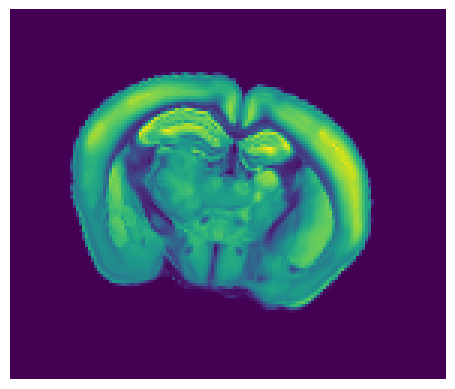

In [126]:
imshow(slice.pointdata["ImageScalars"].reshape(slice.metadata["shape"]))

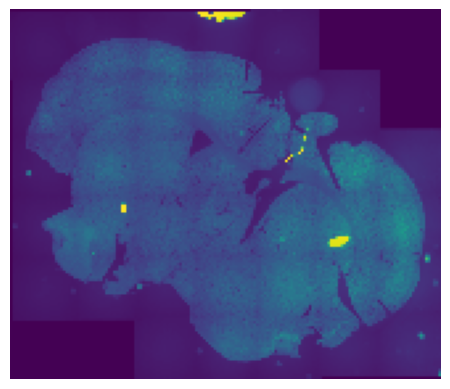

In [127]:
imshow(points_vedo.pointdata["ImageScalars"].reshape(image.shape))